In [2]:
library(ggplot2)
library(lattice)
library(caret)
library(GGally)
library(kernlab)
library(randomForest)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [4]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [6]:
# Remove the first row which contains column names
dataset <- dataset[-1, ]
# Convert the columns to their appropriate types
dataset$Sepal.Length <- as.numeric(dataset$Sepal.Length)
dataset$Sepal.Width <- as.numeric(dataset$Sepal.Width)
dataset$Petal.Length <- as.numeric(dataset$Petal.Length)
dataset$Petal.Width <- as.numeric(dataset$Petal.Width)
dataset$Species <- factor(dataset$Species)
# Verify the structure and distribution again
str(dataset)
table(dataset$Species)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        50         50         50 

In [7]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]
# Convert the Species column to a factor
dataset$Species <- as.factor(dataset$Species)
# List the levels of the Species column
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [8]:
# Inspect the structure of the dataset
str(dataset)
# Check the distribution of the Species column
table(dataset$Species)

'data.frame':	120 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.7 4.6 5 5.4 4.6 5 4.4 4.9 4.8 ...
 $ Sepal.Width : num  3.5 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3 ...
 $ Petal.Length: num  1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.4 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        40         40         40 

In [9]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [10]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [11]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,5.1,3.5,1.4,0.2,setosa
4,4.7,3.2,1.3,0.2,setosa
5,4.6,3.1,1.5,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,setosa
8,4.6,3.4,1.4,0.3,setosa


In [12]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [13]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [14]:
# summarize attribute distributions: perform summary on numeric columns only
numeric_columns <- sapply(iris, is.numeric)
summary(iris[, numeric_columns])


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [15]:
# Visualize Dataset
# split input and output
x <- dataset[, 1:4]
y <- dataset[, 5]

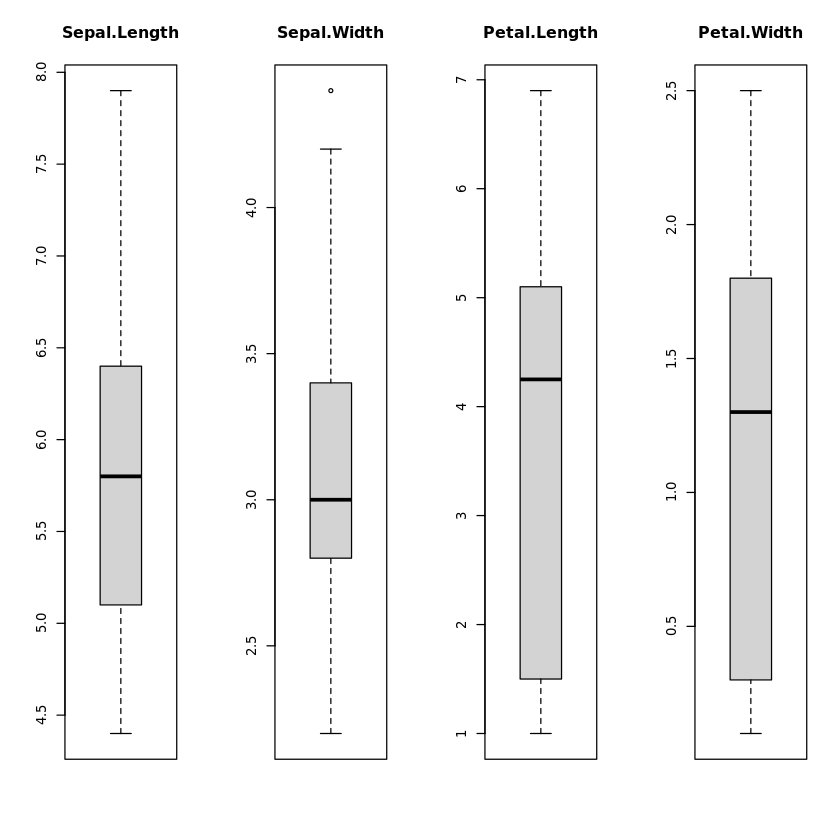

In [16]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

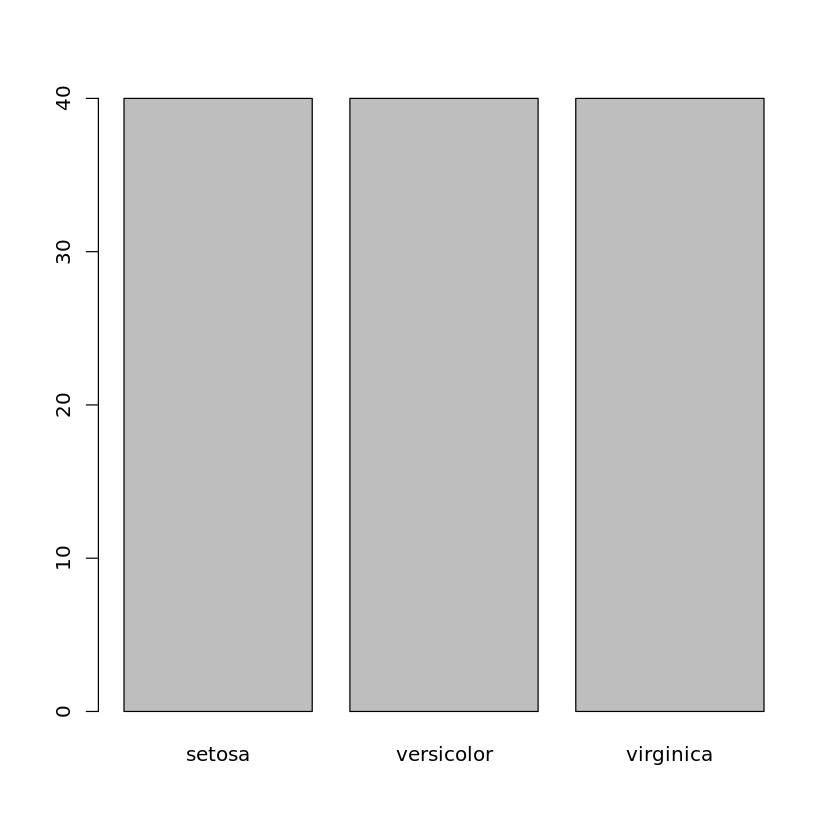

In [17]:
# barplot for class breakdown
plot(y)

ERROR while rich displaying an object: Error in grid.Call.graphics(C_downviewport, name$name, strict): Viewport 'plot_01.panel.1.1.off.vp' was not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](

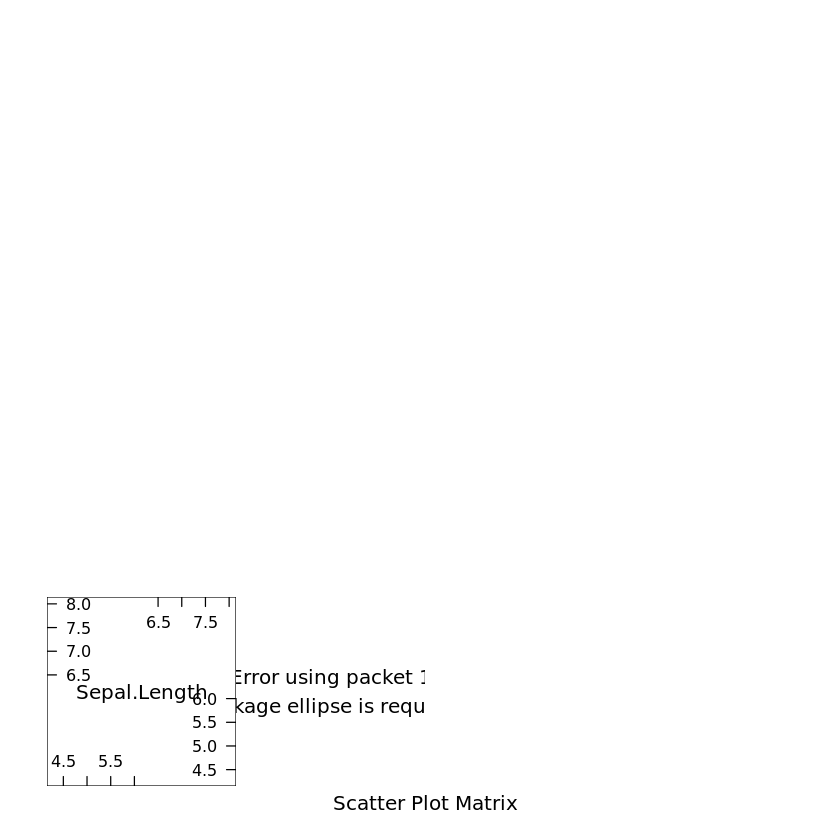

In [18]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

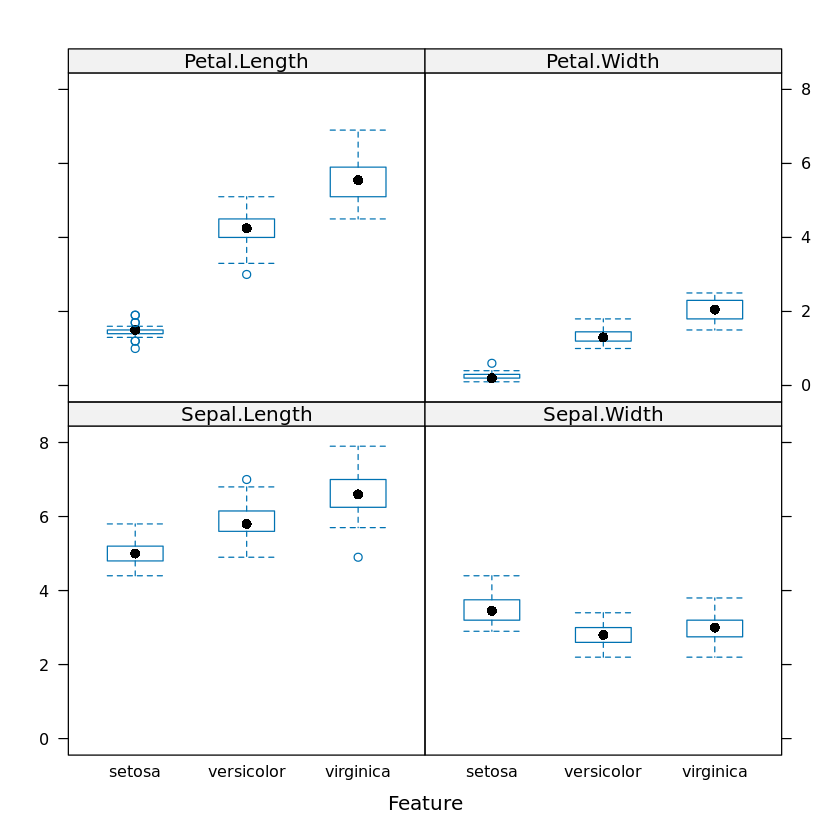

In [19]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

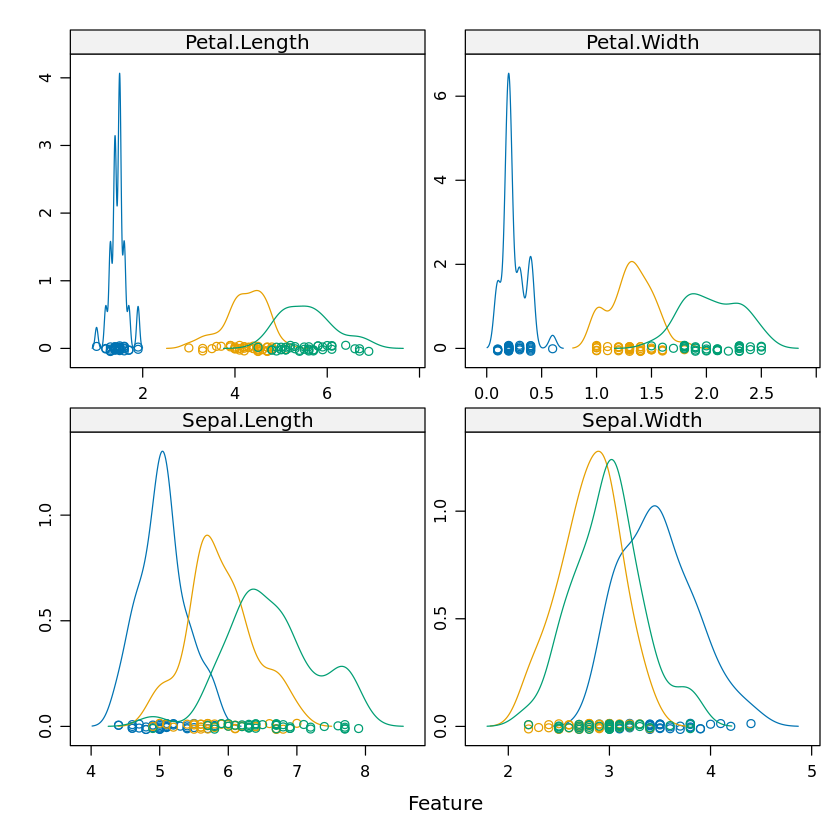

In [20]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [22]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [23]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.9166667 0.9166667 0.9166667 0.9500000       1    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
svm  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
rf   0.9166667 0.9166667 1.0000000 0.9666667       1    1    0

Kappa 
      Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
lda  0.875   1.000  1.000 0.975       1    1    0
cart 0.875   0.875  0.875 0.925       1    1    0
knn  0.875   1.000  1.000 0.975       1    1    0
svm  0.875   0.875  1.000 0.950       1    1    0
rf   0.875   0.875  1.000 0.950       1    1    0


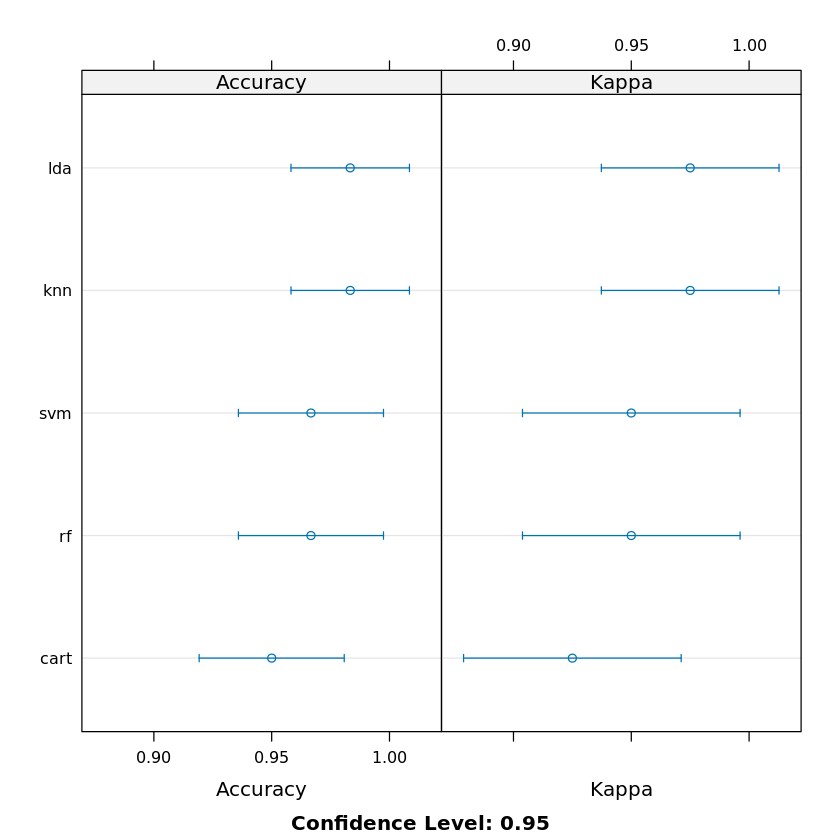

In [24]:
# compare accuracy of models
dotplot(results)

In [25]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [26]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
P